In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

IMPORT DATA

In [3]:
df8=pd.read_csv('Dati_800kY.txt')
pd.read_csv('Dati_800kY.txt')


,Bag,ztop,Age,Deuterium,Temperature
0,13,6.60,38.37379,-390.90,0.88
1,14,7.15,46.81203,-385.10,1.84
2,15,7.70,55.05624,-377.80,3.04
3,16,8.25,64.41511,-394.10,0.35
4,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5783,5796,3187.25,797408.00000,-440.20,-8.73
5784,5797,3187.80,798443.00000,-439.00,-8.54
5785,5798,3188.35,799501.00000,-441.10,-8.88
5786,5799,3188.90,800589.00000,-441.42,-8.92


([<matplotlib.axis.XTick at 0x7f16763c45b0>,
 [Text(0, 0, '-800'),
  Text(200000, 0, '-600'),
  Text(400000, 0, '-400'),
  Text(600000, 0, '-200'),
  Text(800000, 0, '2')])

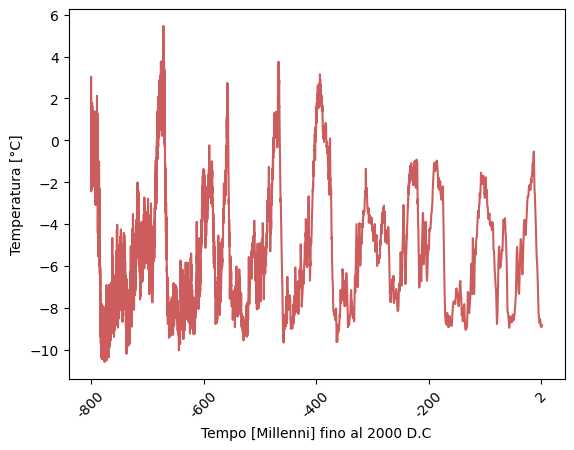

In [5]:
plt.plot(df8.iloc[:, 2], df8.iloc[:, 4],color='#CD5C5C')
plt.xlabel('Tempo [Millenni] fino al 2000 D.C')
plt.ylabel('Temperatura [°C]')
xtick_labels = ['-800', '-600', '-400', '-200', '2']
xtick_positions = [0, 200000, 400000, 600000, 800000]
plt.xticks(xtick_positions, xtick_labels, rotation=45)



LAVORO SU DATI 2000 ANNI

In [5]:
df2=pd.read_csv('2000.csv')
pd.read_csv('2000.csv')

,YEAR,surface_temperature_anomaly,5th percentile,95th percentile,Unnamed: 4
0,1995,0.65,0.46,0.79,NaN
1,1994,0.64,0.46,0.77,NaN
2,1993,0.62,0.45,0.76,NaN
3,1992,0.61,0.45,0.74,NaN
4,1991,0.59,0.44,0.71,NaN
...,...,...,...,...,...
1986,9,0.10,-0.11,0.38,NaN
1987,8,0.10,-0.11,0.38,NaN
1988,7,0.09,-0.11,0.38,NaN
1989,6,0.09,-0.12,0.37,NaN


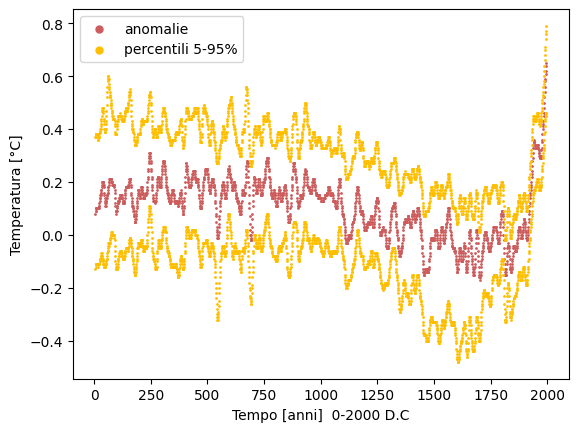

In [6]:
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1],s=1,c='#CD5C5C',label='anomalie')
plt.xlabel('Tempo [anni]  0-2000 D.C')
plt.ylabel('Temperatura [°C]')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 2],s=1,c='#FFBF00',label='percentili 5-95%')
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 3],s=1,c='#FFBF00')
plt.legend(markerscale=5)
#xtick_labels = ['0', '500', '1000', '1500', '2000']
#xtick_positions = [0, 500, 1000, 1500, 2000]
#plt.xticks(xtick_positions, xtick_labels, rotation=45)


LAVORO SU DATI 1000000 ANNI

In [7]:
dfm=pd.read_csv('milioni.csv')
pd.read_csv('milioni.csv')


,Anomaly(°C),YB 2015
0,0.24,1665.0
1,0.37,2465.0
2,0.37,3265.0
3,0.02,4065.0
4,-0.17,4865.0
...,...,...
17599,10.21,65221665.0
17600,10.23,65265265.0
17601,10.42,65346365.0
17602,10.05,65419765.0


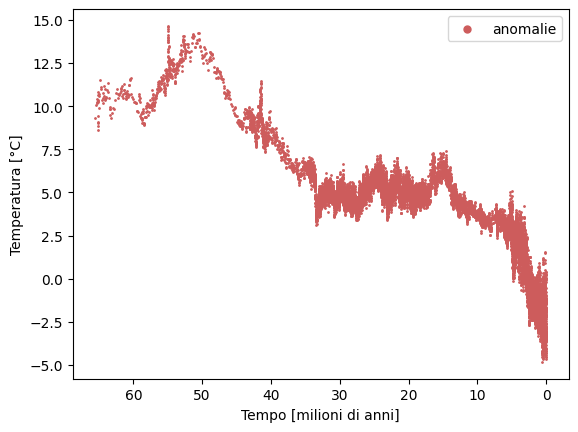

In [8]:
fig, ax = plt.subplots()
ax.scatter(dfm.iloc[:, 1]/1000000, dfm.iloc[:, 0], s=1, c='#CD5C5C', label='anomalie')
ax.invert_xaxis()
ax.set_xlabel('Tempo [milioni di anni]')
ax.set_ylabel('Temperatura [°C]')
ax.legend(markerscale=5)

FACCIO DEI BOXPLOT

Text(0, 0.5, 'temperatura [°C]')

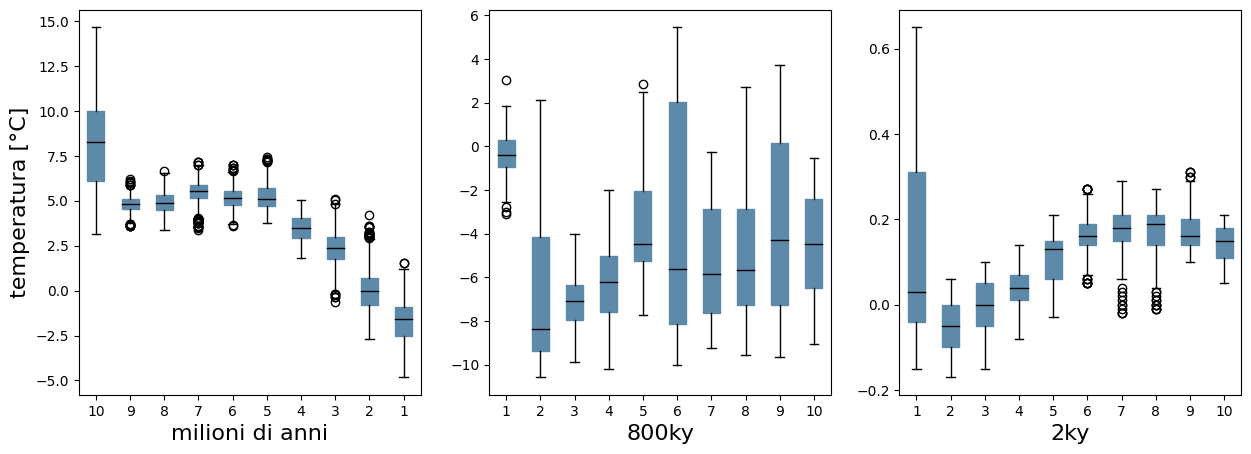

In [9]:
a=df8.iloc[:, 4]
c = [1,2,3,4,5,6,7,8,9,10]
subsets1 = [a[i:i+579] for i in range(0, len(a), 579)]
fig, ax = plt.subplots(ncols=3,figsize=(15,5))
box=ax[1].boxplot(subsets1,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True)
plt.setp(box['boxes'], color='#5D8AA8')
ax[1].set_xlabel('800ky',fontsize='16')


b=df2.iloc[:, 1]
subsets2 = [b[i:i+201] for i in range(0, len(b), 201)]
box=ax[2].boxplot(subsets2,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True)
plt.setp(box['boxes'], color='#5D8AA8')
ax[2].set_xlabel('2ky',fontsize='16')


d=dfm.iloc[:, 0]
subsets3 = [d[i:i+1761] for i in range(0, len(d), 1761)]
box=ax[0].boxplot(subsets3,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True)
plt.setp(box['boxes'], color='#5D8AA8')
ax[0].invert_xaxis()
ax[0].set_xlabel('milioni di anni',fontsize='16')
ax[0].set_ylabel('temperatura [°C]',fontsize='16')



ISTOGRAMMI

(array([ 303., 1401., 1594., 1988., 5591., 5625.,  348.,  434.,  223.,
          97.]),
 array([-4.82 , -2.873, -0.926,  1.021,  2.968,  4.915,  6.862,  8.809,
        10.756, 12.703, 14.65 ]),
 <BarContainer object of 10 artists>)

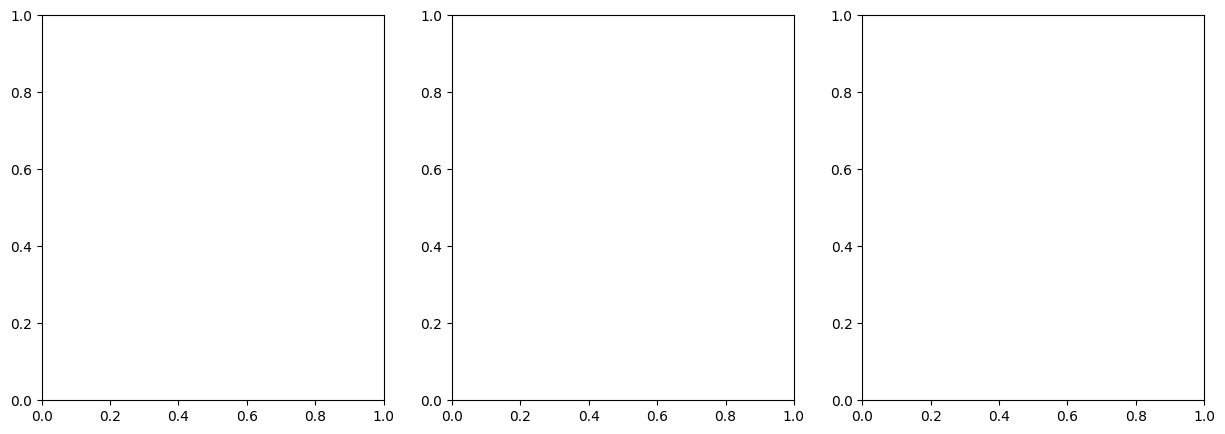

In [10]:
fig, axs= plt.subplots(ncols=3,figsize=(15,5)) 
ax[0].hist(dfm.iloc[:, 0],bins=10)